In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
ica_faces = dr_datasets.get_faces_ica()
random_faces = dr_datasets.get_faces_random_projection()
boosted_faces = dr_datasets.get_faces_boosted_best_features()

Running ICA for 188 components


In [3]:
reload(common)
n = ica_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(ica_faces, n)

For n_clusters = 2 average silhouette_score: 0.10749933704493982 time taken: 0.13725996017456055s
For n_clusters = 3 average silhouette_score: 0.09824267583962631 time taken: 0.15289783477783203s
For n_clusters = 4 average silhouette_score: 0.1125596121604351 time taken: 0.16715216636657715s
For n_clusters = 5 average silhouette_score: 0.07829520525318992 time taken: 0.3411295413970947s
For n_clusters = 6 average silhouette_score: 0.07793168553135808 time taken: 0.17989253997802734s
For n_clusters = 7 average silhouette_score: 0.02339386152378609 time taken: 0.23369050025939941s
For n_clusters = 8 average silhouette_score: 0.02291817506041873 time taken: 0.3219757080078125s
For n_clusters = 9 average silhouette_score: 0.05914355120510792 time taken: 0.266937255859375s
For n_clusters = 10 average silhouette_score: 0.0568320264629015 time taken: 0.18687772750854492s
For n_clusters = 11 average silhouette_score: 0.0499053269122526 time taken: 0.24709582328796387s
For n_clusters = 12 avera

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


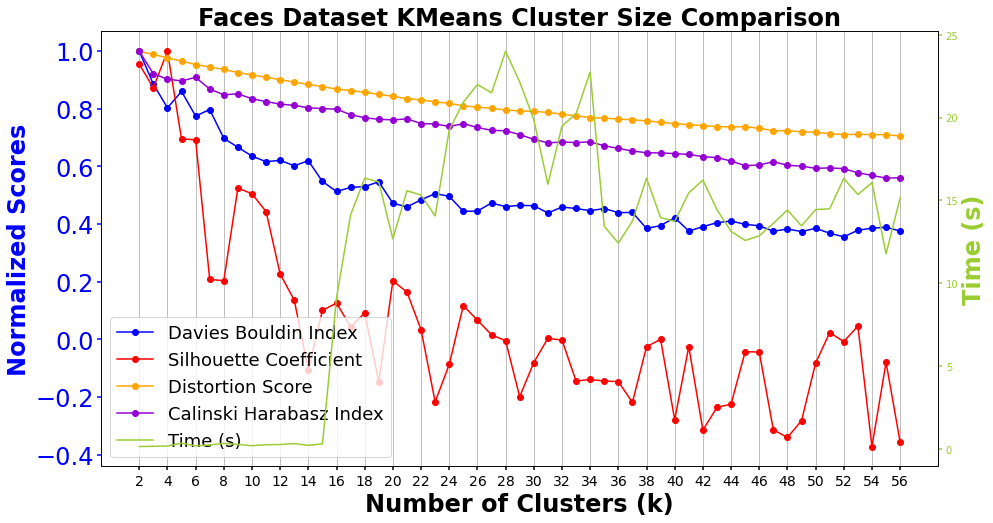

In [4]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


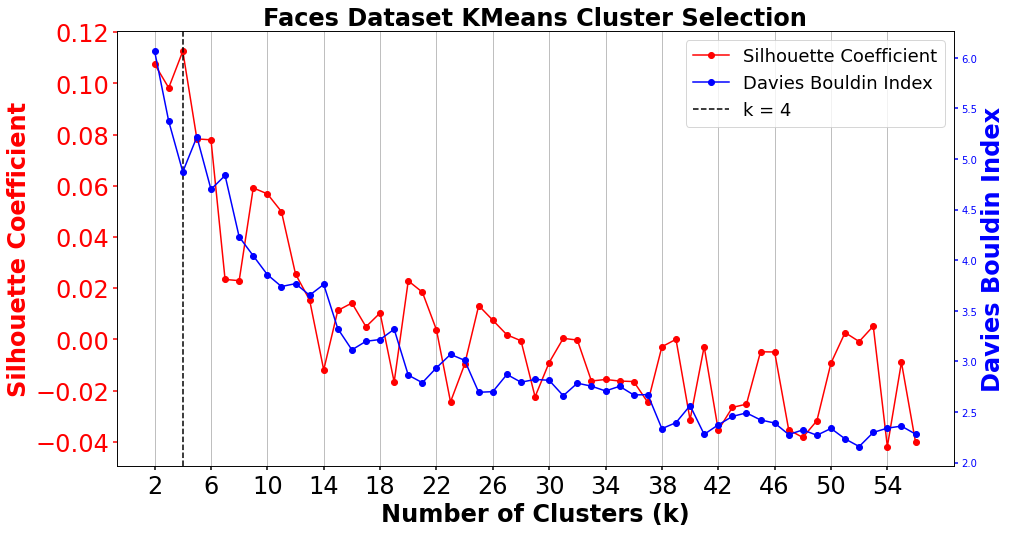

In [14]:
reload(common)
best_k = 4
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 4 average silhouette_score: 0.1125596121604351 time taken: 0.23694753646850586s


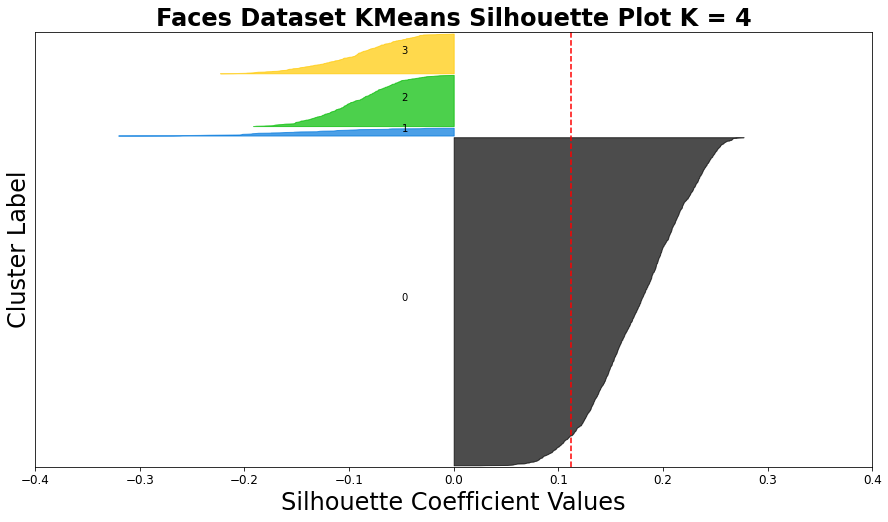

In [17]:
reload(common)
common.plot_silhouette_kmeans(ica_faces, best_k, DATASET, xlim=[-0.4, 0.4])

In [18]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(ica_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
ica_faces_km = pd.DataFrame(ica_faces.copy())
ica_faces_km['km_labels'] = km.labels_
ica_faces_km_vis = ica_faces_km.copy()
ica_faces_km_vis['sex'] = y_train_faces['sex']
ica_faces_km_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))

Time Taken 0.2348794937133789 s
homogeneity_score sex:  0.0008388783807349554
homogeneity_score race:  0.003848753264686759


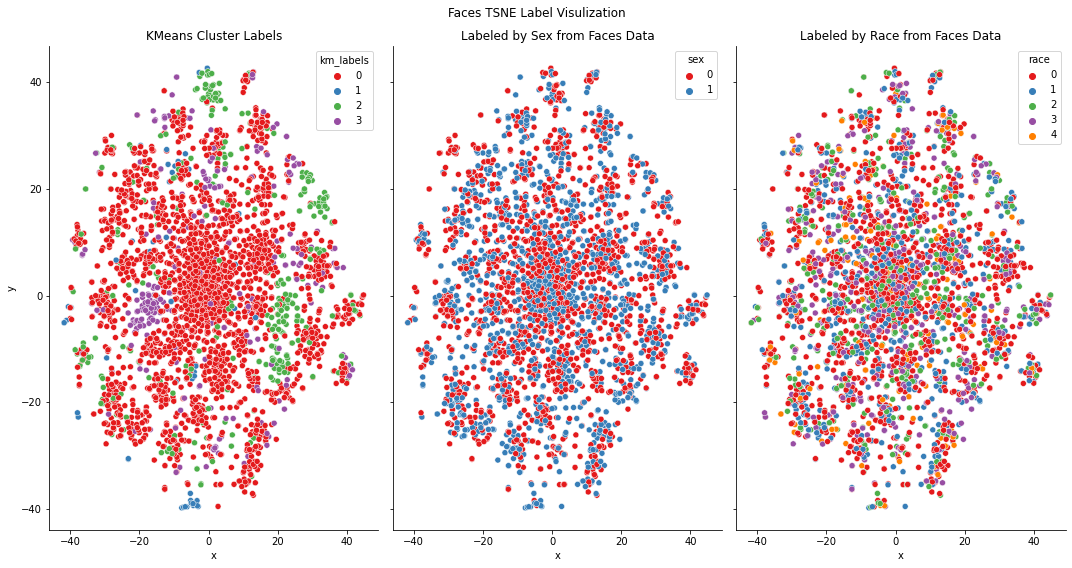

In [19]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

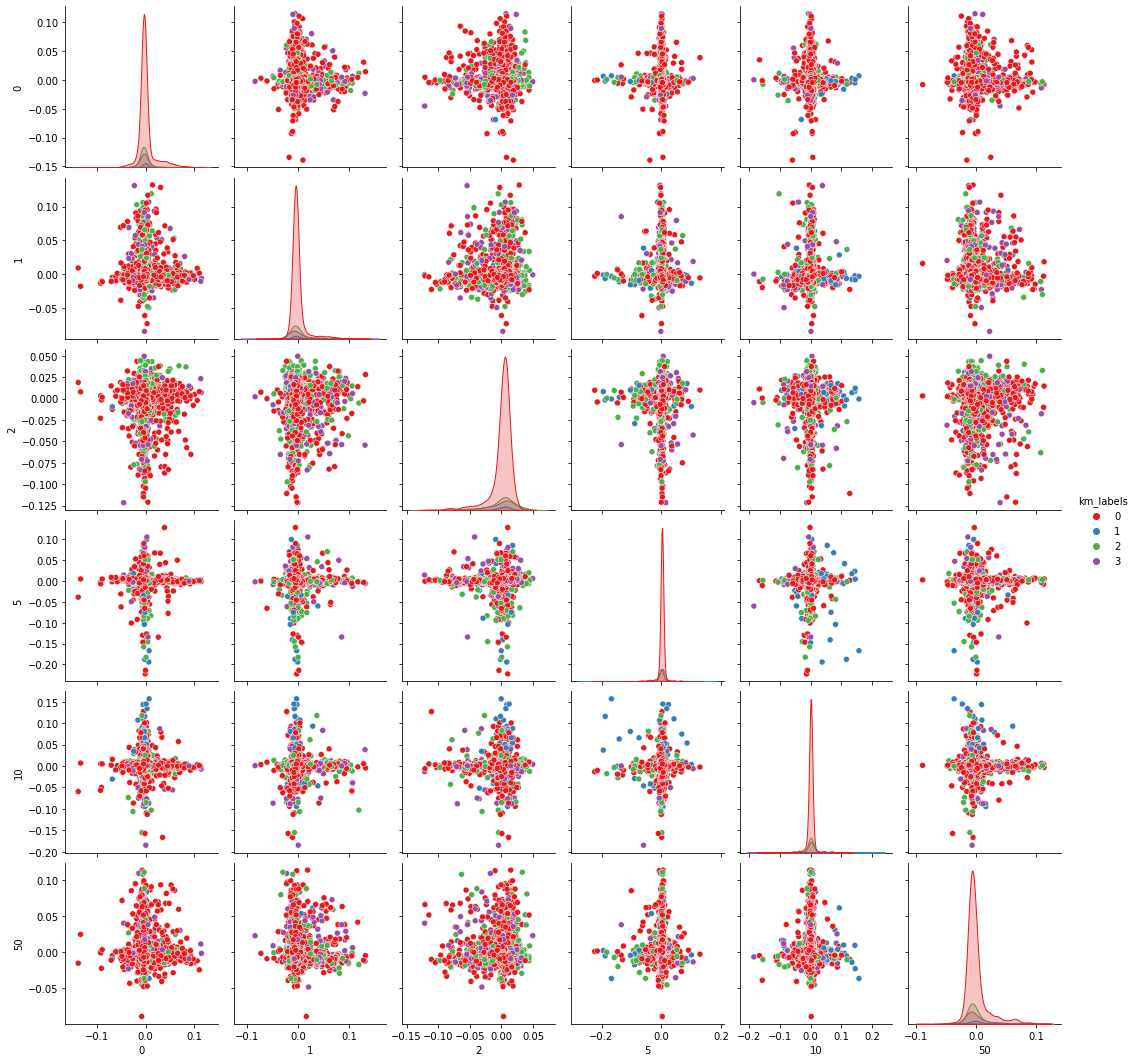

In [20]:
sns.pairplot(ica_faces_km[[0, 1, 2, 5, 10, 50, "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [21]:
reload(common)
em_n = ica_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(ica_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.08148467371717924 time taken: 0.5609416961669922s
For n_clusters = 3 average silhouette_score: 0.045340086204803454 time taken: 1.4069430828094482s
For n_clusters = 4 average silhouette_score: 0.029723908495539096 time taken: 1.2003748416900635s
For n_clusters = 5 average silhouette_score: -0.04035817204828569 time taken: 1.7771668434143066s
For n_clusters = 6 average silhouette_score: -0.01601067443385197 time taken: 1.8543994426727295s
For n_clusters = 7 average silhouette_score: -0.03495032347420448 time taken: 3.5241658687591553s
For n_clusters = 8 average silhouette_score: -0.033364125951384264 time taken: 2.2405946254730225s
For n_clusters = 9 average silhouette_score: -0.050974935429446235 time taken: 3.424530506134033s
For n_clusters = 10 average silhouette_score: -0.048973821621215836 time taken: 4.817109823226929s
For n_clusters = 11 average silhouette_score: -0.07263347344255343 time taken: 3.494063138961792s
For n_clusters = 12

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


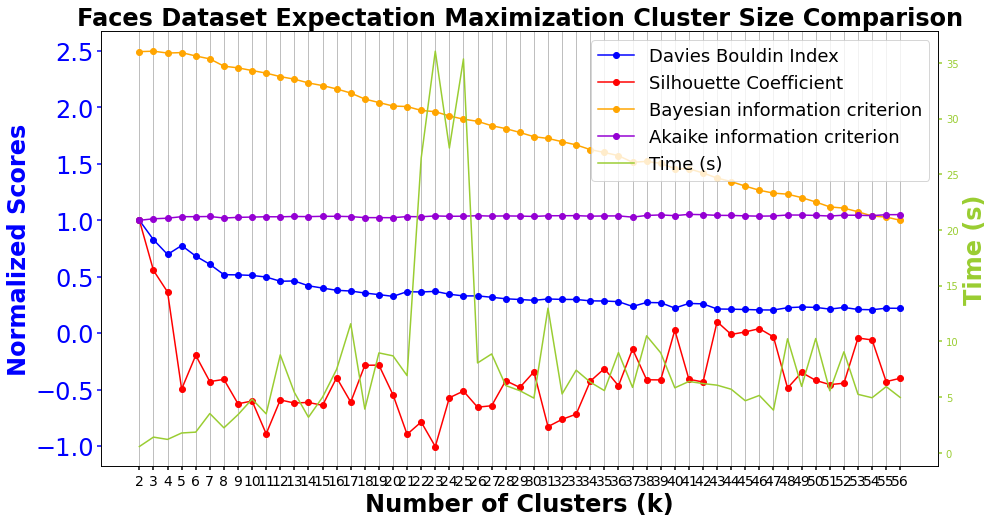

In [22]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


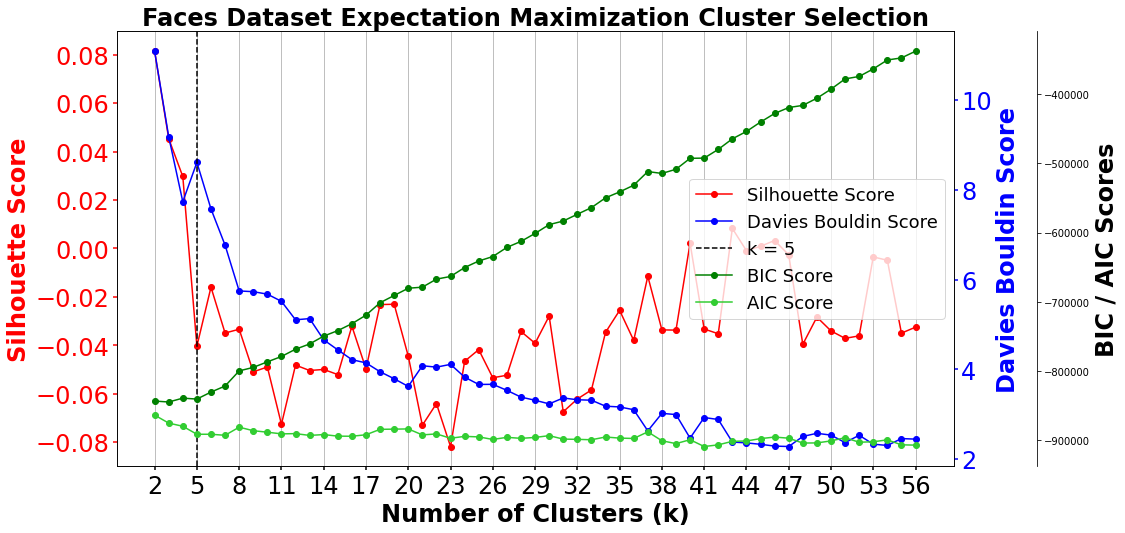

In [23]:
reload(common)
best_k = 5
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 5 average silhouette_score: -0.04035817204828569 time taken: 1.6162910461425781s


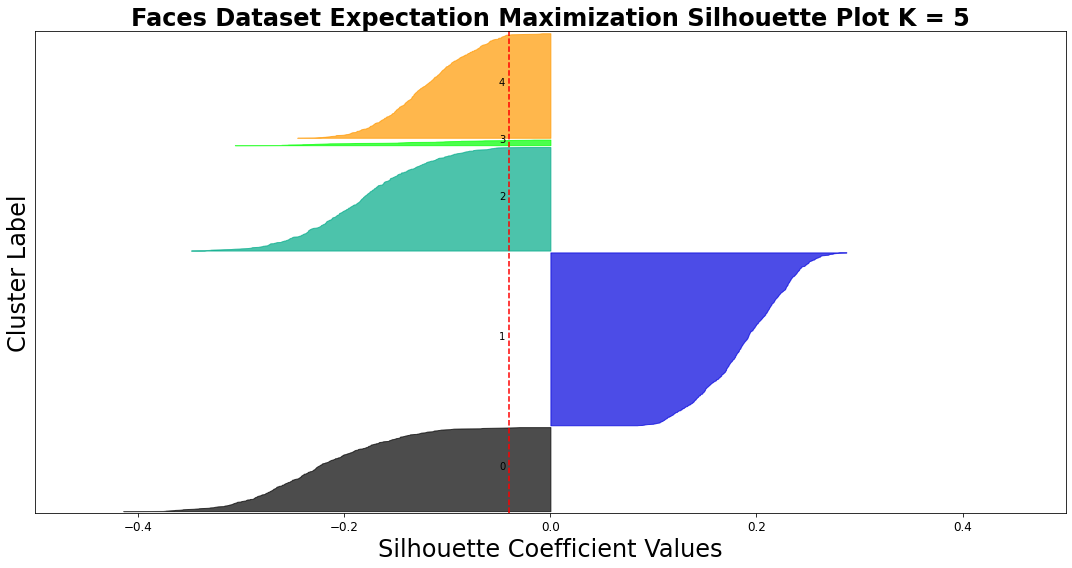

In [32]:
reload(common)
best_k=5
common.plot_silhouette_em(ica_faces, best_k, DATASET, xlim=[-0.5, 0.5])

In [38]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(ica_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(ica_faces)
ica_faces_gm = pd.DataFrame(ica_faces.copy())
ica_faces_gm['em_labels'] = em_model.predict(ica_faces)

ica_faces_gm_vis = ica_faces_gm.copy()
ica_faces_gm_vis['sex'] = y_train_faces['sex']
ica_faces_gm_vis['race'] = y_train_faces['race']

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(ica_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(ica_faces), y_train_faces['race']))

time taken 1.858834981918335 s
homogeneity_score sex:  0.0008855191354103823
homogeneity_score race:  0.0022312731927010914


In [43]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

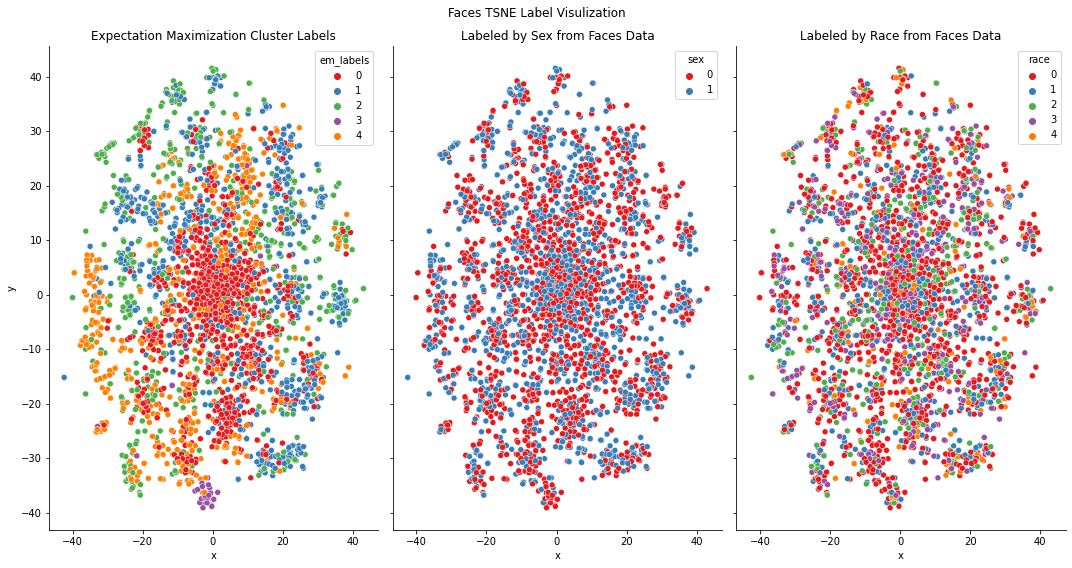

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

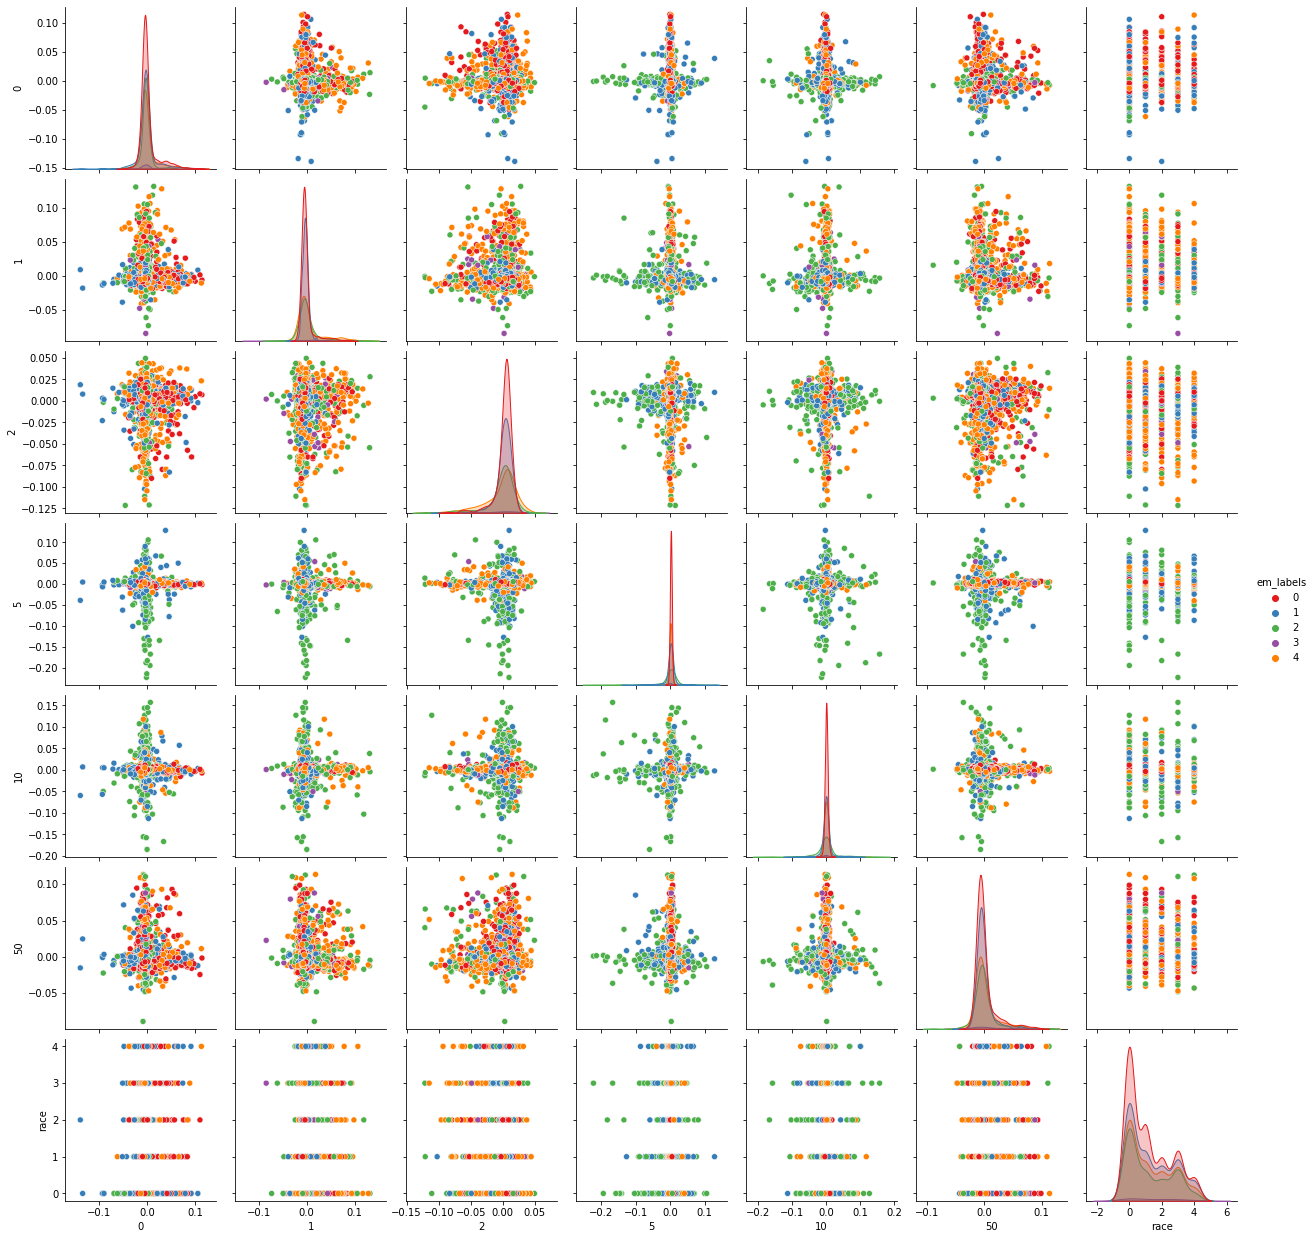

In [42]:
sns.pairplot(ica_faces_gm_vis[[0, 1, 2, 5, 10, 50, "race", "em_labels"]], hue="em_labels", palette="Set1")